### Session 5

**Introduction to Solving Regression problems** 

Steps to solve regression problems -

1) Data Cleaning/Understanding

 - Data Analysis - Distribution, Range, Data Type etc.
 - Missing values - How many? What to do with them? How to Impute? etc.
 - Data Normalization/Scaling
 
2) Understand the relationship between Independent Variables/Predictors

 - Are the independednt variables correlated?
 - How many variables to use in the prediction?
 - Is there any variable transformation required?
 
3) Model building and Evaluation

 - Understanding model fit
 - Identify significant predictors
 - Tweak variables for a better fit
 - Model Evaluation parameters
 
Let's understand these using the example below
 
**Outcome of a classical Linear Regression Problem**
 
Identify the factors that influence an outcome

### Download Weather station data

In [39]:
## Execute the curl command to download the data to the current folder

!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 64689    0 64689    0     0  32344      0 --:--:--  0:00:02 --:--:-- 28560
100  143k    0  143k    0     0  48864      0 --:--:--  0:00:03 --:--:-- 41154
100  223k    0  223k    0     0  57125      0 --:--:--  0:00:04 --:--:-- 53376
100  255k    0  255k    0     0  52254      0 --:--:--  0:00:05 --:--:-- 50979
100  287k    0  287k    0     0  49005      0 --:--:--  0:00:06 --:--:-- 59544
100  303k    0  303k    0     0  44345      0 --:--:--  0:00:07 --:--:-- 48687
100  335k    0  335k    0     0  42895      0 --:--:--  0:00:08 --:--:-- 40455
100  383k    0  383k    0     0  43590      0 --:--

#### Load the data into workspace using python Pandas module

In [40]:
import pandas as pd

weather = pd.read_csv("FremontBridge.csv", index_col='Date', parse_dates=True)
bike = pd.read_csv("Bikesharing.csv", index_col = "DATE", parse_dates=True)

#### Check for the top 5 rows using dataframe_name.head()

In [41]:
print("Weather data")
display(weather.head())
print("Bikesharing data")
display(bike.head())

Weather data


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Bikesharing data


,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


#### Compute the daily bicycle traffic

In [42]:
daily = bike.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

#### Adding additional Dimensions to the Data

Adding additional dimensions to the data like Day of the Week to see the patterns in the traffic

In [43]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [44]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
DATE,,,,,,,,
2012-01-01,-119371,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-01-02,-99010,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-03,-119296,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-01-04,-98934,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-01-05,-109104,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Adding US Holiday data to observe the bike rider patterns on holidays

In [45]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [46]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
DATE,,,,,,,,,
2012-01-01,-119371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-01-02,-99010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-01-03,-119296,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-04,-98934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-01-05,-109104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Feature Engineering and Scaling

 - Add average temperature
 - Add Total Precipitation
 - Flag to identify dry days (where precipitation = 0)

In [47]:
# Temperatures are expressed in 1/10th of degrees C, convert to C

bike['TMIN'] /= 10
bike['TMAX'] /= 10
bike['Temp (C)'] = 0.5 * (bike['TMIN'] + bike['TMAX'])

# precipitation is in 1/10th of mm; convert to inches
bike['PRCP'] /= 254
bike['dry day'] = (bike['PRCP'] == 0).astype(int)

daily = daily.join(bike[['PRCP', 'Temp (C)', 'dry day']])


#### Capture the deviations in daily values

In [68]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

#### Hours of Daylight

(8, 17)

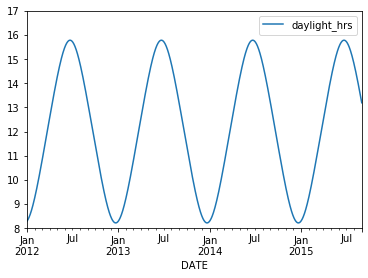

In [67]:
import matplotlib.pyplot as plt

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

#### Handling the missing values

In [48]:
# Drop all rows with NULL values
daily.dropna(axis=0, how='any', inplace=True)

In [49]:
daily.shape

(1340, 12)

#### Building Linear regression model

In [82]:
### Predictors to be used in the model
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']

## Defining the set of predictors
X = daily[column_names]
## Labels
y = daily['Total']

from sklearn.linear_model import LinearRegression

## Define the model and fit
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

## predict using the fit model
daily['predicted'] = model.predict(X)

#### Get R-squared value

In [84]:
print(model.score(X, y))

0.3865031331759331


#### Plot the actual and predicted values

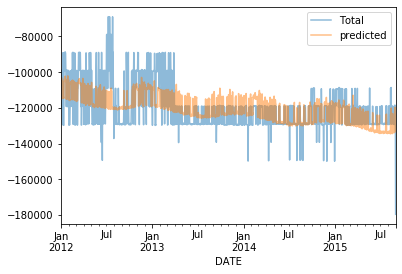

In [85]:
daily[['Total', 'predicted']].plot(alpha=0.5)

#### Get co-efficients/weights for the model predictors

In [87]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon            -102705.310902
Tue            -103180.477941
Wed            -102563.059452
Thu            -101897.155223
Fri            -102744.245636
Sat            -102493.825830
Sun            -102273.532756
holiday           1201.764795
daylight_hrs      -268.922844
PRCP              3318.213270
dry day          -9333.436183
Temp (C)           -99.737649
annual           -4388.501859
dtype: float64

#### Get the standard errors for the estimates

In [88]:
import numpy as np
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [89]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                effect   error
Mon          -102705.0  1664.0
Tue          -103180.0  1662.0
Wed          -102563.0  1635.0
Thu          -101897.0  1675.0
Fri          -102744.0  1634.0
Sat          -102494.0  1653.0
Sun          -102274.0  1638.0
holiday         1202.0  1712.0
daylight_hrs    -269.0   156.0
PRCP            3318.0  1163.0
dry day        -9333.0   722.0
Temp (C)        -100.0    68.0
annual         -4389.0   280.0


#### Get standardized model coefficients

In [81]:
import statsmodels.api as sm
from scipy.stats.mstats import zscore

print(sm.OLS(zscore(y), zscore(X)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     45.85
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           1.05e-78
Time:                        18:56:39   Log-Likelihood:                -1702.9
No. Observations:                1340   AIC:                             3426.
Df Residuals:                    1330   BIC:                             3478.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.929e+12   3.11e+12      1.263      0.2